In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin

In [2]:
#Task A Question a
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

data = ticker.history(period='5y')

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0
2021-01-15 00:00:00-05:00,156.151001,157.127502,154.758499,155.212494,84880000,0.0,0.0
2021-01-19 00:00:00-05:00,155.350006,157.250000,154.800003,156.037994,66102000,0.0,0.0
2021-01-20 00:00:00-05:00,159.099503,163.990005,158.750000,163.169006,106196000,0.0,0.0
2021-01-21 00:00:00-05:00,164.649994,167.427505,164.478500,165.349503,98722000,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-08 00:00:00-05:00,243.059998,246.410004,241.880005,246.289993,39509800,0.0,0.0
2026-01-09 00:00:00-05:00,244.570007,247.860001,242.240005,247.380005,34560000,0.0,0.0
2026-01-12 00:00:00-05:00,246.729996,248.940002,245.960007,246.470001,35867800,0.0,0.0


<Axes: xlabel='Date', ylabel='Amazon Stock Prices'>

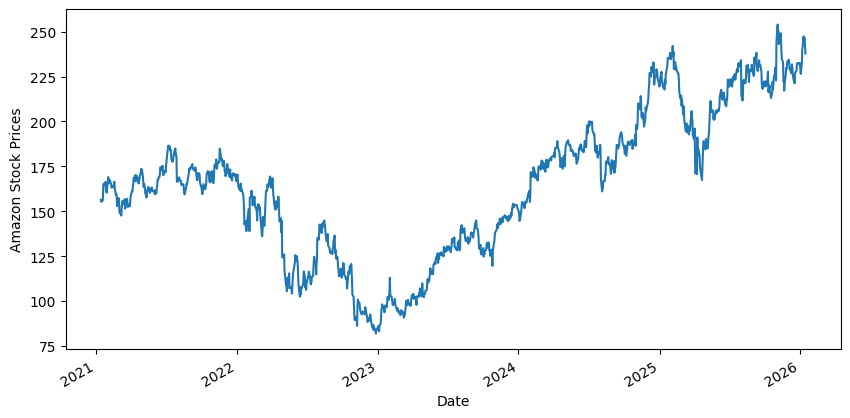

In [4]:
#Plot and Comment on Simple Line Chart
#Comment on Line Chart Behaviour- See Cwk Documentation
plt.ylabel("Amazon Stock Prices")

data['Close'].plot(figsize=(10,5))

In [5]:
#Task A Question b
#MA20
data['MA_20'] = data['Close'].rolling(window=20).mean()

#MA50
data['MA_50'] = data['Close'].rolling(window=50).mean()

#EMA20
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

#RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0,NaN,NaN,156.373505,NaN
2021-01-15 00:00:00-05:00,156.151001,157.127502,154.758499,155.212494,84880000,0.0,0.0,NaN,NaN,156.262932,NaN
2021-01-19 00:00:00-05:00,155.350006,157.250000,154.800003,156.037994,66102000,0.0,0.0,NaN,NaN,156.241510,NaN
2021-01-20 00:00:00-05:00,159.099503,163.990005,158.750000,163.169006,106196000,0.0,0.0,NaN,NaN,156.901271,NaN
2021-01-21 00:00:00-05:00,164.649994,167.427505,164.478500,165.349503,98722000,0.0,0.0,NaN,NaN,157.705865,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-08 00:00:00-05:00,243.059998,246.410004,241.880005,246.289993,39509800,0.0,0.0,230.898000,232.9586,233.255365,82.938391
2026-01-09 00:00:00-05:00,244.570007,247.860001,242.240005,247.380005,34560000,0.0,0.0,231.678000,233.3212,234.600569,80.702813
2026-01-12 00:00:00-05:00,246.729996,248.940002,245.960007,246.470001,35867800,0.0,0.0,232.487500,233.6446,235.730991,78.200588


In [7]:
data = data.dropna()

In [8]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-03-25 00:00:00-04:00,153.649506,155.488998,151.856995,152.313004,71270000,0.0,0.0,153.465176,158.984140,154.904675,53.723473
2021-03-26 00:00:00-04:00,152.203003,152.832993,149.800003,152.601501,66258000,0.0,0.0,153.362926,158.870280,154.685325,58.743973
2021-03-29 00:00:00-04:00,152.772003,154.562500,151.422501,153.786499,54920000,0.0,0.0,153.186901,158.818540,154.599723,51.327611
2021-03-30 00:00:00-04:00,153.500504,153.649994,151.699997,152.764496,46752000,0.0,0.0,153.088801,158.769580,154.424939,49.765130
2021-03-31 00:00:00-04:00,153.203003,155.966507,153.125000,154.703995,61878000,0.0,0.0,153.311501,158.742900,154.451516,47.980937
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06 00:00:00-05:00,232.100006,243.179993,232.070007,240.929993,53764700,0.0,0.0,229.246000,232.225201,230.864699,77.099929
2026-01-07 00:00:00-05:00,239.610001,245.289993,239.520004,241.559998,42236500,0.0,0.0,229.979500,232.572200,231.883299,77.504360
2026-01-08 00:00:00-05:00,243.059998,246.410004,241.880005,246.289993,39509800,0.0,0.0,230.898000,232.958600,233.255365,82.938391


In [9]:
# Initialising X and assigning the two feature variables
X = data[['EMA_20','MA_50']]

# Getting the head of the data
X.head()

,EMA_20,MA_50
Date,,
2021-03-25 00:00:00-04:00,154.904675,158.98414
2021-03-26 00:00:00-04:00,154.685325,158.87028
2021-03-29 00:00:00-04:00,154.599723,158.81854
2021-03-30 00:00:00-04:00,154.424939,158.76958
2021-03-31 00:00:00-04:00,154.451516,158.74290


In [10]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-03-25 00:00:00-04:00,152.313004
2021-03-26 00:00:00-04:00,152.601501
2021-03-29 00:00:00-04:00,153.786499
2021-03-30 00:00:00-04:00,152.764496
2021-03-31 00:00:00-04:00,154.703995


In [11]:
#Task A Question c

# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(data))

# Define Train Dataset
X_train = X[:t]
y_train = y[:t]

# Define Test Dataset
X_test = X[t:]
y_test = y[t:]

In [13]:
X[:t]

,EMA_20,MA_50
Date,,
2021-03-25 00:00:00-04:00,154.904675,158.984140
2021-03-26 00:00:00-04:00,154.685325,158.870280
2021-03-29 00:00:00-04:00,154.599723,158.818540
2021-03-30 00:00:00-04:00,154.424939,158.769580
2021-03-31 00:00:00-04:00,154.451516,158.742900
...,...,...
2024-07-26 00:00:00-04:00,187.669101,187.138200
2024-07-29 00:00:00-04:00,187.243472,187.082400
2024-07-30 00:00:00-04:00,186.716476,187.044000


In [14]:
y[:t]

,Close
Date,
2021-03-25 00:00:00-04:00,152.313004
2021-03-26 00:00:00-04:00,152.601501
2021-03-29 00:00:00-04:00,153.786499
2021-03-30 00:00:00-04:00,152.764496
2021-03-31 00:00:00-04:00,154.703995
...,...
2024-07-26 00:00:00-04:00,182.500000
2024-07-29 00:00:00-04:00,183.199997
2024-07-30 00:00:00-04:00,181.710007


In [15]:
X[t:]

,EMA_20,MA_50
Date,,
2024-08-02 00:00:00-04:00,184.716934,186.795201
2024-08-05 00:00:00-04:00,182.460083,186.353000
2024-08-06 00:00:00-04:00,180.504837,185.970600
2024-08-07 00:00:00-04:00,178.815805,185.611000
2024-08-08 00:00:00-04:00,177.576205,185.284001
...,...,...
2026-01-06 00:00:00-05:00,230.864699,232.225201
2026-01-07 00:00:00-05:00,231.883299,232.572200
2026-01-08 00:00:00-05:00,233.255365,232.958600


In [16]:
y[t:]

,Close
Date,
2024-08-02 00:00:00-04:00,167.899994
2024-08-05 00:00:00-04:00,161.020004
2024-08-06 00:00:00-04:00,161.929993
2024-08-07 00:00:00-04:00,162.770004
2024-08-08 00:00:00-04:00,165.800003
...,...
2026-01-06 00:00:00-05:00,240.929993
2026-01-07 00:00:00-05:00,241.559998
2026-01-08 00:00:00-05:00,246.289993


In [17]:
#Reproducible Seed
import numpy as np
np.random.seed(42)

In [18]:
#Task A Question d

#Define Linear Regression Model
from sklearn.linear_model import LinearRegression

#Train Linear Regression Model
model = LinearRegression().fit(X_train,y_train)
print("Linear Regression Model Defined and Trained")


Linear Regression Model Defined and Trained


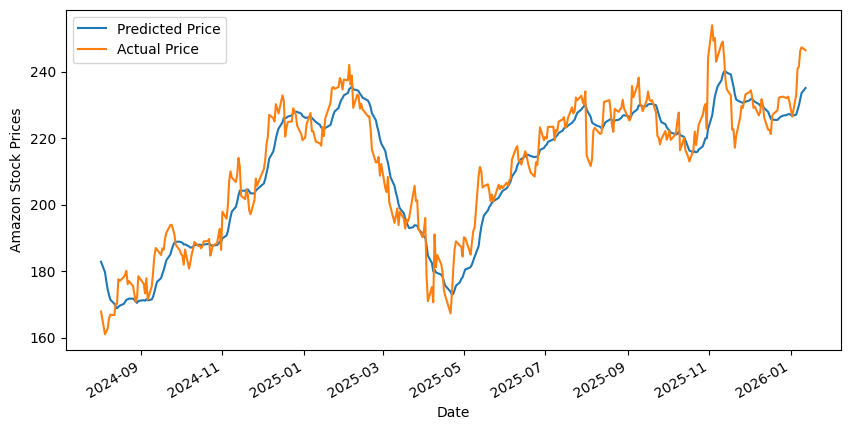

The model has a 89.31% accuracy.


In [19]:
#Task Question e

#Test Linear Regression Model
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Close'])

#Visualise Linear Regression Model
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Amazon Stock Prices")
plt.show()

# Compute the accuracy of Linear Regression Model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

In [20]:
#Task A Question f

#Extract alpha & beta values
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')


alpha = 2.816684828494431
betas = [ 1.51697016 -0.53621815]


In [21]:
#Formulate Linear Regression Model
alpha = model.intercept_
beta1, beta2 = model.coef_

sign = "-" if beta2 < 0 else "+"

print(f"Linear Regression Model: ŷ = {alpha:.4f} + {beta1:.4f}(EMA_20) {sign} {abs(beta2):.4f}(MA_50)")

Linear Regression Model: ŷ = 2.8167 + 1.5170(EMA_20) - 0.5362(MA_50)
